In [ ]:
#https://www.kaggle.com/tunguz/big-five-personality-test

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from random import sample
import seaborn as sns
sns.set_theme()
#plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)

In [4]:
df=pd.read_csv('data-final-clean.csv')


In [5]:
df.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB


In [6]:
# select 150,000 samples from the total group

df2=df.sample(n=500000)
df2.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
542004,4.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,...,2.0,5.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0,US
232923,4.0,2.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,2.0,...,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,US
822228,5.0,2.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,...,1.0,5.0,1.0,5.0,2.0,5.0,5.0,5.0,5.0,EE
181192,1.0,4.0,2.0,5.0,2.0,3.0,2.0,5.0,2.0,5.0,...,1.0,4.0,1.0,5.0,5.0,5.0,4.0,4.0,5.0,NONE
37815,1.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,5.0,1.0,...,1.0,3.0,1.0,2.0,3.0,4.0,1.0,4.0,1.0,ID


In [7]:
# copy df2 (samples) into a new dataframe df5 for value counts and perform Elbow Techique

df5=df2.iloc[:,0:-1]

In [8]:
# divide the whole group into 3 clusters as determined by Elbow Technique using sum of squared error and assign to a
# new columun 'clusters'

df2['clusters'] = KMeans(n_clusters=3, random_state=42).fit_predict(df5)

In [9]:
# find out the number in each cluster 

grp5=df2.clusters.value_counts()
grp5

0    186313
1    170987
2    142700
Name: clusters, dtype: int64

In [10]:
df2.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
542004,4.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,...,5.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0,US,2
232923,4.0,2.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,2.0,...,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,US,1
822228,5.0,2.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,...,5.0,1.0,5.0,2.0,5.0,5.0,5.0,5.0,EE,2


In [11]:
# split the main sampled dataframe df2 into 3 dataframes by cluster number (0,1,2)

df_0=df2[df2['clusters']==0]
df_1=df2[df2['clusters']==1]
df_2=df2[df2['clusters']==2]



In [12]:
# review cluster number zero dataframe : df_0

df_0.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
181192,1.0,4.0,2.0,5.0,2.0,3.0,2.0,5.0,2.0,5.0,...,4.0,1.0,5.0,5.0,5.0,4.0,4.0,5.0,NONE,0
795825,4.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,5.0,...,4.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,DK,0
425591,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,PK,0
863047,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,...,5.0,1.0,4.0,1.0,5.0,4.0,5.0,4.0,US,0
581425,1.0,3.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,NONE,0


In [13]:
# review cluster number zero dataframe : df_1

df_1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
232923,4.0,2.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,2.0,...,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,US,1
37815,1.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,5.0,1.0,...,3.0,1.0,2.0,3.0,4.0,1.0,4.0,1.0,ID,1
105521,2.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,1.0,4.0,...,4.0,2.0,4.0,2.0,5.0,2.0,4.0,4.0,US,1
69859,4.0,5.0,4.0,4.0,4.0,3.0,2.0,5.0,5.0,4.0,...,3.0,2.0,3.0,3.0,5.0,5.0,4.0,3.0,US,1
97061,3.0,3.0,4.0,2.0,3.0,2.0,2.0,4.0,3.0,4.0,...,5.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US,1


In [14]:
# review cluster number zero dataframe : df_2

df_2.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
542004,4.0,2.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,...,5.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0,US,2
822228,5.0,2.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,...,5.0,1.0,5.0,2.0,5.0,5.0,5.0,5.0,EE,2
330522,3.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,...,4.0,1.0,3.0,2.0,4.0,3.0,4.0,2.0,US,2
366243,4.0,1.0,4.0,2.0,3.0,3.0,3.0,2.0,4.0,4.0,...,4.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,CA,2
782247,2.0,4.0,3.0,4.0,4.0,2.0,2.0,4.0,4.0,3.0,...,3.0,1.0,4.0,2.0,4.0,4.0,5.0,4.0,US,2


In [15]:
#Using Elbow Technique to find out the most optimum value of k clusters

k = range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i, random_state=1).fit(df5)
    sse.append(km.inertia_)

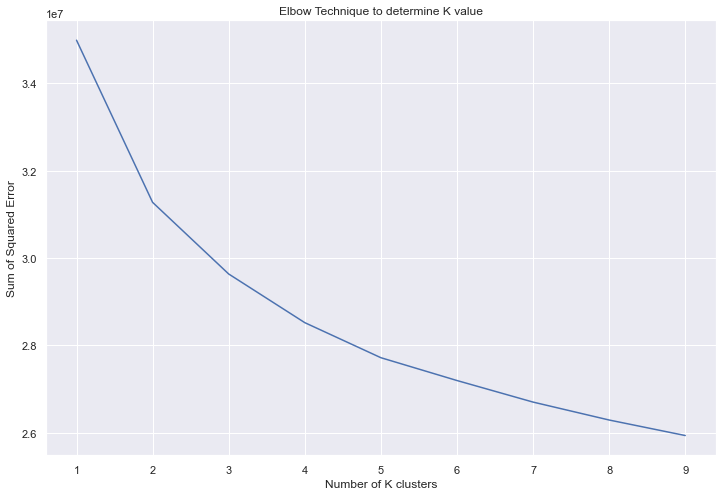

In [16]:
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [17]:
# find out the mode of all features of group 0

group0_EXT=df_0.iloc[:,0:10].mode(axis=0).mode(axis=1).mean(axis=1)
group0_EST=df_0.iloc[:,10:20].mode(axis=0).mode(axis=1).mean(axis=1)
group0_AGR=df_0.iloc[:,20:30].mode(axis=0).mode(axis=1).mean(axis=1)
group0_CSN=df_0.iloc[:,30:40].mode(axis=0).mode(axis=1).mean(axis=1)
group0_OPN=df_0.iloc[:,40:50].mode(axis=0).mode(axis=1).mean(axis=1)

group1_EXT=df_1.iloc[:,0:10].mode(axis=0).mode(axis=1).mean(axis=1)
group1_EST=df_1.iloc[:,10:20].mode(axis=0).mode(axis=1).mean(axis=1)
group1_AGR=df_1.iloc[:,20:30].mode(axis=0).mode(axis=1).mean(axis=1)
group1_CSN=df_1.iloc[:,30:40].mode(axis=0).mode(axis=1).mean(axis=1)
group1_OPN=df_1.iloc[:,40:50].mode(axis=0).mode(axis=1).mean(axis=1)

group2_EXT=df_2.iloc[:,0:10].mode(axis=0).mode(axis=1).mean(axis=1)
group2_EST=df_2.iloc[:,10:20].mode(axis=0).mode(axis=1).mean(axis=1)
group2_AGR=df_2.iloc[:,20:30].mode(axis=0).mode(axis=1).mean(axis=1)
group2_CSN=df_2.iloc[:,30:40].mode(axis=0).mode(axis=1).mean(axis=1)
group2_OPN=df_2.iloc[:,40:50].mode(axis=0).mode(axis=1).mean(axis=1)

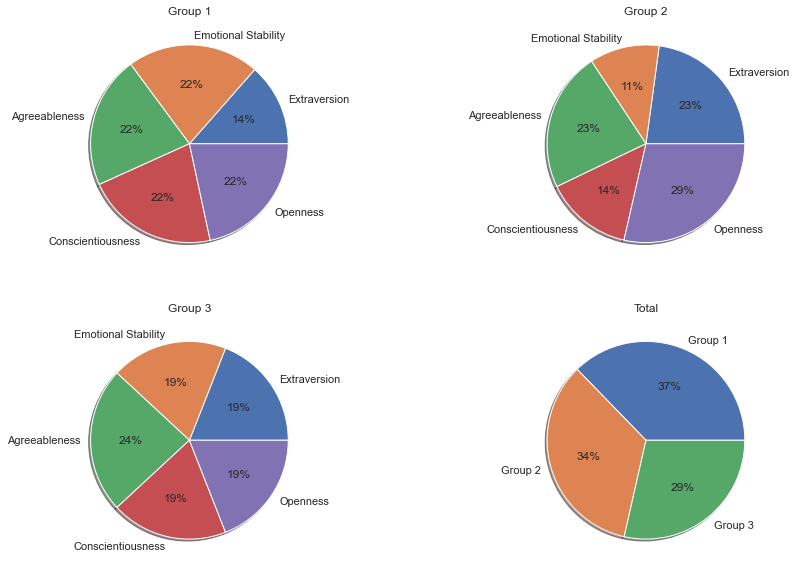

In [19]:
# plot a pie chart
group0_list = np.array([group0_EXT,group0_EST,group0_AGR,group0_CSN,group0_OPN]).reshape(-1,)
group1_list = np.array([group1_EXT,group1_EST,group1_AGR,group1_CSN,group1_OPN]).reshape(-1,)
group2_list = np.array([group2_EXT,group2_EST,group2_AGR,group2_CSN,group2_OPN]).reshape(-1,)


labels=['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']
labels1=['Group 1','Group 2', 'Group 3']

fig, axs = plt.subplots(2, 2);
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

axs[0, 0].pie(group0_list, labels=labels, autopct='%1.0f%%', shadow=True);
axs[0, 0].set_title('Group 1');

axs[0, 1].pie(group1_list, labels=labels, autopct='%1.0f%%', shadow=True);
axs[0, 1].set_title('Group 2');

axs[1, 0].pie(group2_list, labels=labels, autopct='%1.0f%%', shadow=True);
axs[1, 0].set_title('Group 3');

axs[1, 1].pie(grp5, labels=labels1, autopct='%1.0f%%', shadow=True);
axs[1, 1].set_title('Total');

#fig.delaxes(axs[1,1])

# EST :Emotional Stability (your level of calmness and tranquility)
# EXT : Extraversion (your level of sociability and enthusiasm)
# OPN : Intellect (your level of creativity and curiosity)
# CSN : Conscientiousness (your level of organization and work ethic)
# AGR : Agreeableness (your level of friendliness and kindness)

# Grp 1: Balanced group, however may lack the enthusiasm and energy of extraversion
# Grp 2: Supportive and compliant group, however lack the advantage which other traits can contribute
# Grp 3: Supportive group with innovation and enthusiasm, however may lack the conscientiousness to complete the task

In [20]:
# draw 10000 samples from original database

df7=df.sample(n=500000)
df8=pd.DataFrame()

In [21]:
df7.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
456553,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,2.0,4.0,3.0,3.0,1.0,3.0,3.0,4.0,3.0,US
201429,5.0,2.0,5.0,1.0,5.0,2.0,2.0,2.0,5.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,1.0,5.0,3.0,AU
661906,1.0,5.0,1.0,5.0,1.0,4.0,1.0,2.0,2.0,5.0,...,1.0,4.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,GB


In [22]:
# find the mode of EXT

df8['EXT_AVG']=df7.loc[:,'EXT1':'EXT10'].mean(axis=1)
df8['EST_AVG']=df7.loc[:,'EST1':'EST10'].mean(axis=1)
df8['AGR_AVG']=df7.loc[:,'AGR1':'AGR10'].mean(axis=1)
df8['CSN_AVG']=df7.loc[:,'CSN1':'CSN10'].mean(axis=1)
df8['OPN_AVG']=df7.loc[:,'OPN1':'OPN10'].mean(axis=1)

In [23]:
# draw out 1000 samples to see the comparison between all 5 personal traits on a global level

df11=df8.sample(n=10000,random_state=2)
df11.shape

(10000, 5)

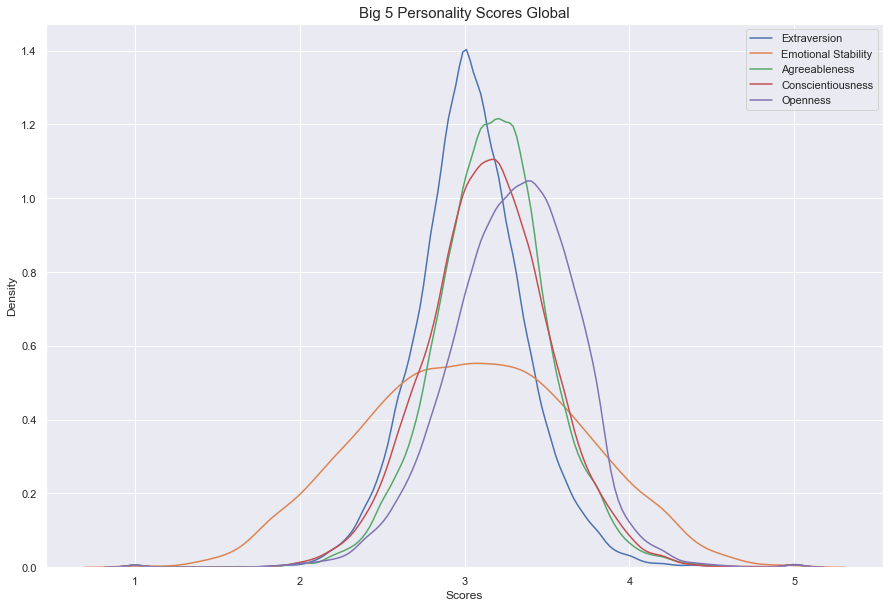

In [24]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.kdeplot(df11['EXT_AVG']);
sns.kdeplot(df11['EST_AVG']);
sns.kdeplot(df11['AGR_AVG']);
sns.kdeplot(df11['CSN_AVG']);
sns.kdeplot(df11['OPN_AVG']);
plt.xlabel('Scores');
plt.ylabel('Density');
plt.legend(['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness'])
plt.title('Big 5 Personality Scores Global', fontsize=15);

In [25]:
#creating a dataframe with country 

df9 = pd.concat([df8,df7.country], axis=1)

In [26]:
# draw out 10000 sample of dataframe for model for South East Asian Countries
df12=df9.sample(n=100000, random_state=1)
df12.replace('NONE',np.nan, inplace=True)

# draw out 10000 sample of dataframe for model for South East Asian Countries
df14=df9.sample(n=10000, random_state=1)
df14.replace('NONE',np.nan, inplace=True)
df14.dropna(inplace=True)

In [27]:
# dataframe by country


df_IN= df12[df12['country']=='IN']
df_PH= df12[df12['country']=='PH']
df_MY= df12[df12['country']=='MY']
df_SG= df12[df12['country']=='SG']
df_CH= df12[df12['country']=='CH']
df_HK= df12[df12['country']=='HK']
df_VN= df12[df12['country']=='VN']
df_KR= df12[df12['country']=='KR']
df_LK= df12[df12['country']=='LK']
df_MM= df12[df12['country']=='MM']
df_TH= df12[df12['country']=='TH']
df_ID= df12[df12['country']=='ID']
df_KH= df12[df12['country']=='KH']


df_US= df14[df14['country']=='US']
df_GB= df14[df14['country']=='GB']
df_AU= df14[df14['country']=='AU']
df_JP= df14[df14['country']=='JP']
df_CA= df14[df14['country']=='CA']
df_DE= df14[df14['country']=='DE']
df_IT= df14[df14['country']=='IT']
df_FR= df14[df14['country']=='FR']

In [28]:
df_SEA = pd.concat([df_KH,df_IN,df_PH,df_MY,df_SG,df_VN,df_MM,df_ID])


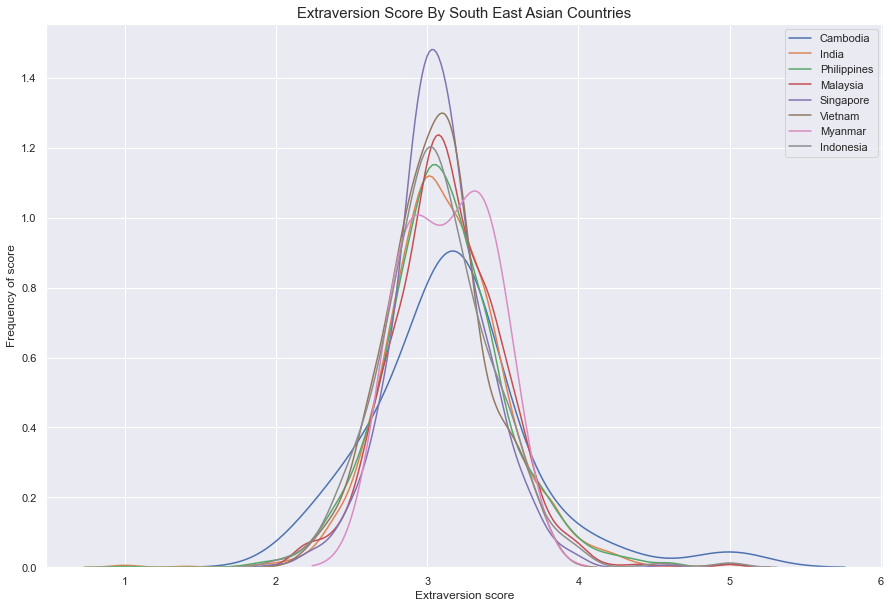

In [29]:
# chart Extraversion score by South East Asian Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_KH['EXT_AVG']);
sns.kdeplot(df_IN['EXT_AVG']);
sns.kdeplot(df_PH['EXT_AVG']);
sns.kdeplot(df_MY['EXT_AVG']);
sns.kdeplot(df_SG['EXT_AVG']);
sns.kdeplot(df_VN['EXT_AVG']);
sns.kdeplot(df_MM['EXT_AVG']);
sns.kdeplot(df_ID['EXT_AVG']);
plt.legend(['Cambodia','India','Philippines','Malaysia','Singapore','Vietnam','Myanmar','Indonesia']);
plt.xlabel('Extraversion score');
plt.ylabel('Frequency of score');
plt.title('Extraversion Score By South East Asian Countries', fontsize=15);

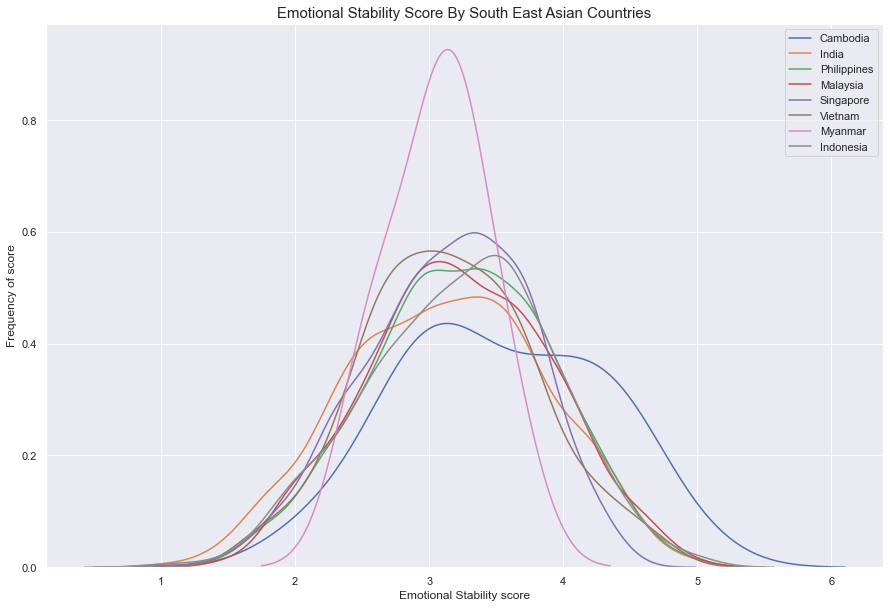

In [30]:
# chart Emotional Stability score by South East Asian Countries

sns.kdeplot(df_KH['EST_AVG']);
sns.kdeplot(df_IN['EST_AVG']);
sns.kdeplot(df_PH['EST_AVG']);
sns.kdeplot(df_MY['EST_AVG']);
sns.kdeplot(df_SG['EST_AVG']);
sns.kdeplot(df_VN['EST_AVG']);
sns.kdeplot(df_MM['EST_AVG']);
sns.kdeplot(df_ID['EST_AVG']);
plt.legend(['Cambodia','India','Philippines','Malaysia','Singapore','Vietnam','Myanmar','Indonesia']);
plt.xlabel('Emotional Stability score');
plt.ylabel('Frequency of score');
plt.title('Emotional Stability Score By South East Asian Countries', fontsize=15);

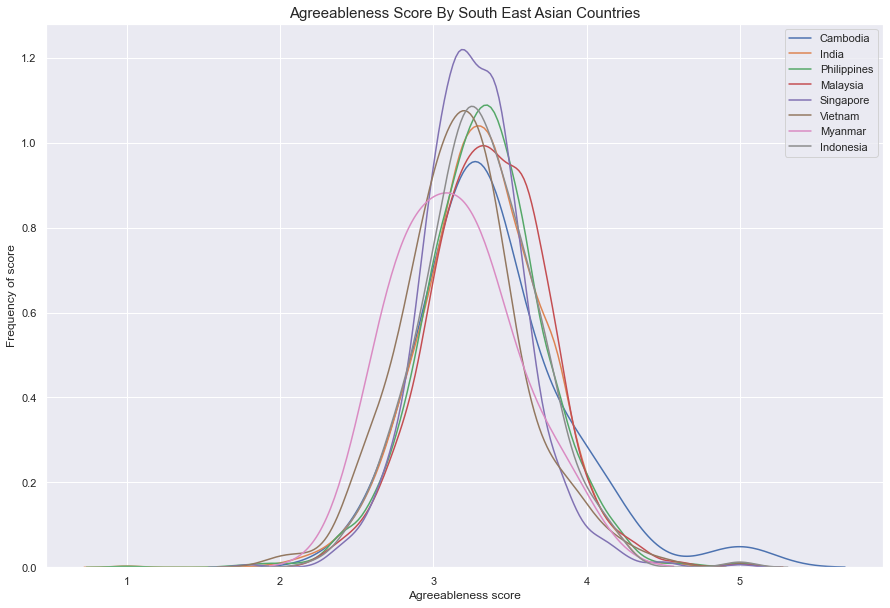

In [31]:
# chart Agreeableness score by South East Asian Countries

sns.kdeplot(df_KH['AGR_AVG']);
sns.kdeplot(df_IN['AGR_AVG']);
sns.kdeplot(df_PH['AGR_AVG']);
sns.kdeplot(df_MY['AGR_AVG']);
sns.kdeplot(df_SG['AGR_AVG']);
sns.kdeplot(df_VN['AGR_AVG']);
sns.kdeplot(df_MM['AGR_AVG']);
sns.kdeplot(df_ID['AGR_AVG']);
plt.legend(['Cambodia','India','Philippines','Malaysia','Singapore','Vietnam','Myanmar','Indonesia']);
plt.xlabel('Agreeableness score');
plt.ylabel('Frequency of score');
plt.title('Agreeableness Score By South East Asian Countries', fontsize=15);

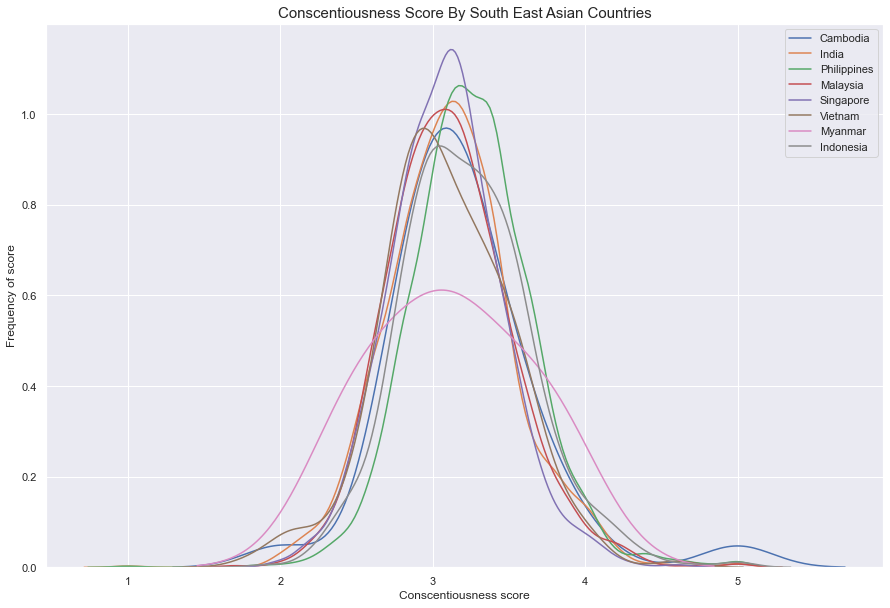

In [32]:
# chart Conscentiousness score by South East Asian Countries

sns.kdeplot(df_KH['CSN_AVG']);
sns.kdeplot(df_IN['CSN_AVG']);
sns.kdeplot(df_PH['CSN_AVG']);
sns.kdeplot(df_MY['CSN_AVG']);
sns.kdeplot(df_SG['CSN_AVG']);
sns.kdeplot(df_VN['CSN_AVG']);
sns.kdeplot(df_MM['CSN_AVG']);
sns.kdeplot(df_ID['CSN_AVG']);
plt.legend(['Cambodia','India','Philippines','Malaysia','Singapore','Vietnam','Myanmar','Indonesia']);
plt.xlabel('Conscentiousness score');
plt.ylabel('Frequency of score');
plt.title('Conscentiousness Score By South East Asian Countries', fontsize=15);

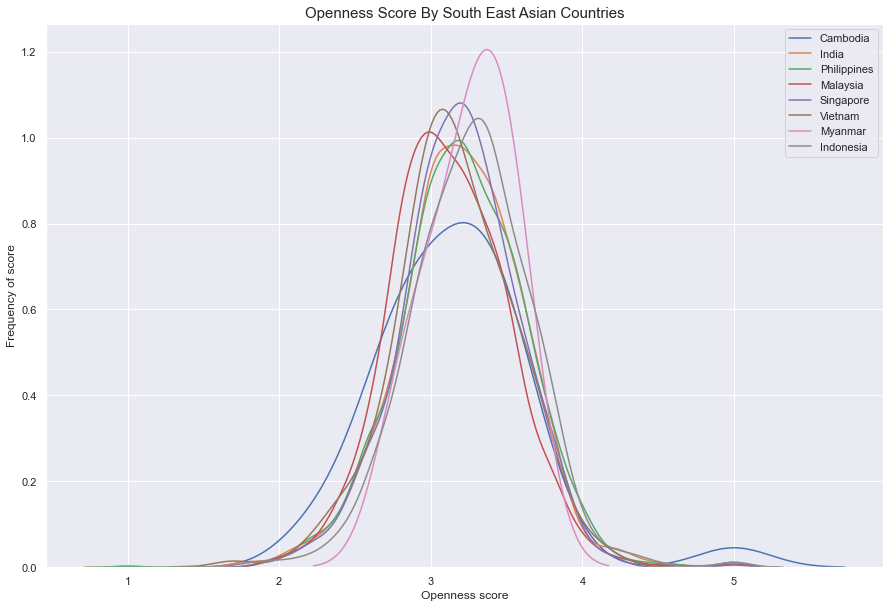

In [33]:
# chart Openness score by South East Asian Countries

sns.kdeplot(df_KH['OPN_AVG']);
sns.kdeplot(df_IN['OPN_AVG']);
sns.kdeplot(df_PH['OPN_AVG']);
sns.kdeplot(df_MY['OPN_AVG']);
sns.kdeplot(df_SG['OPN_AVG']);
sns.kdeplot(df_VN['OPN_AVG']);
sns.kdeplot(df_MM['OPN_AVG']);
sns.kdeplot(df_ID['OPN_AVG']);
plt.legend(['Cambodia','India','Philippines','Malaysia','Singapore','Vietnam','Myanmar','Indonesia']);
plt.xlabel('Openness score');
plt.ylabel('Frequency of score');
plt.title('Openness Score By South East Asian Countries', fontsize=15);

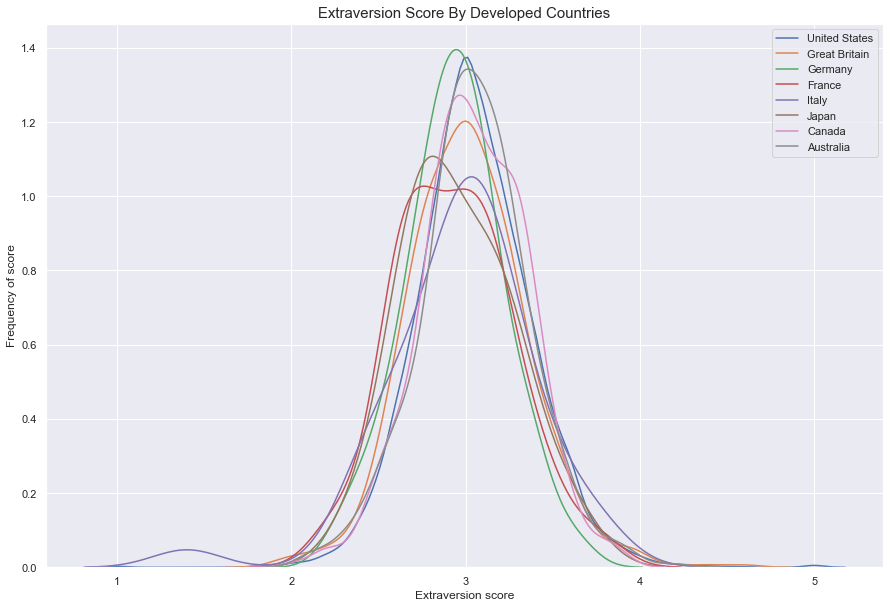

In [34]:
# chart Extraversion score by Developed Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_US['EXT_AVG']);
sns.kdeplot(df_GB['EXT_AVG']);
sns.kdeplot(df_DE['EXT_AVG']);
sns.kdeplot(df_FR['EXT_AVG']);
sns.kdeplot(df_IT['EXT_AVG']);
sns.kdeplot(df_JP['EXT_AVG']);
sns.kdeplot(df_CA['EXT_AVG']);
sns.kdeplot(df_AU['EXT_AVG']);
plt.legend(['United States','Great Britain','Germany','France','Italy','Japan','Canada','Australia']);
plt.xlabel('Extraversion score');
plt.ylabel('Frequency of score');
plt.title('Extraversion Score By Developed Countries', fontsize=15);

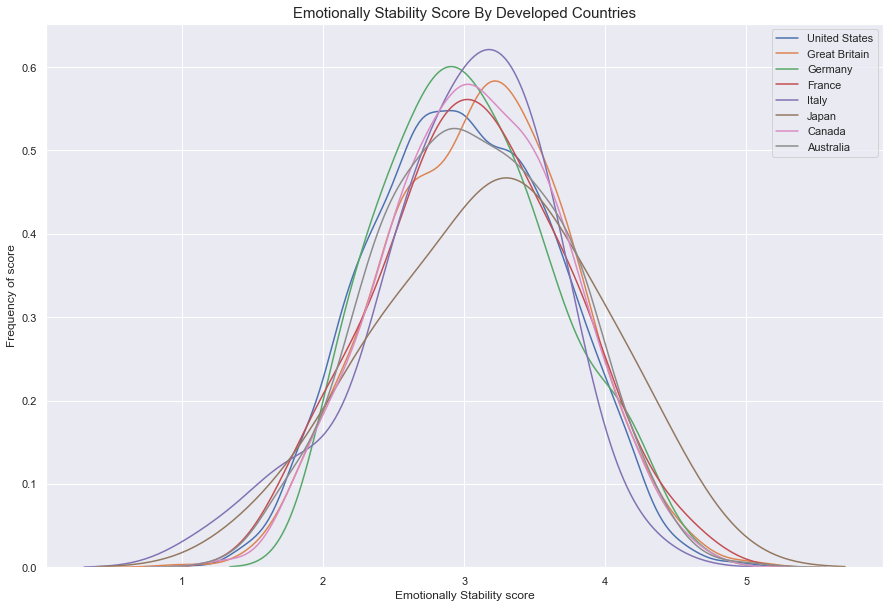

In [35]:
# chart Emotionally Stability score by Developed Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_US['EST_AVG']);
sns.kdeplot(df_GB['EST_AVG']);
sns.kdeplot(df_DE['EST_AVG']);
sns.kdeplot(df_FR['EST_AVG']);
sns.kdeplot(df_IT['EST_AVG']);
sns.kdeplot(df_JP['EST_AVG']);
sns.kdeplot(df_CA['EST_AVG']);
sns.kdeplot(df_AU['EST_AVG']);
plt.legend(['United States','Great Britain','Germany','France','Italy','Japan','Canada','Australia']);
plt.xlabel('Emotionally Stability score');
plt.ylabel('Frequency of score');
plt.title('Emotionally Stability Score By Developed Countries', fontsize=15);

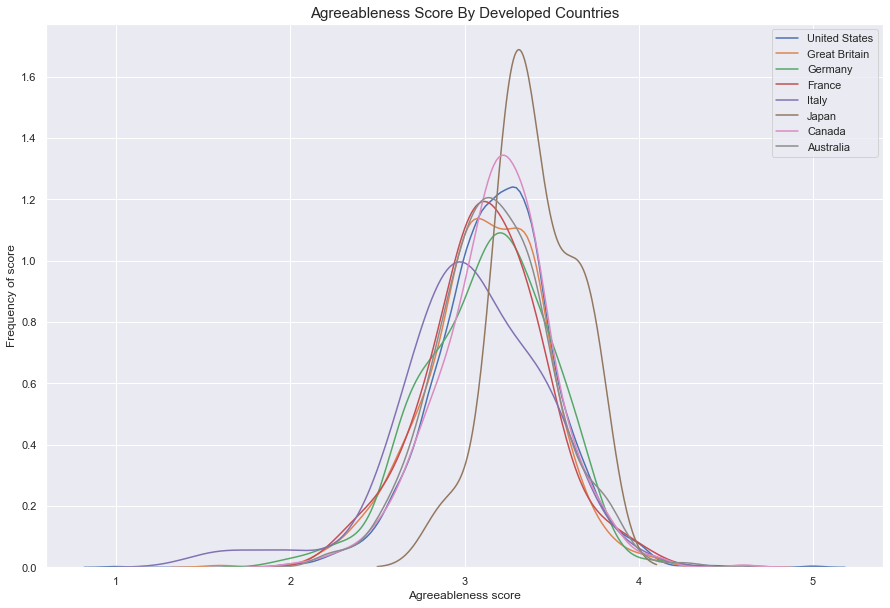

In [36]:
# chart Agreeableness score by Developed Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_US['AGR_AVG']);
sns.kdeplot(df_GB['AGR_AVG']);
sns.kdeplot(df_DE['AGR_AVG']);
sns.kdeplot(df_FR['AGR_AVG']);
sns.kdeplot(df_IT['AGR_AVG']);
sns.kdeplot(df_JP['AGR_AVG']);
sns.kdeplot(df_CA['AGR_AVG']);
sns.kdeplot(df_AU['AGR_AVG']);
plt.legend(['United States','Great Britain','Germany','France','Italy','Japan','Canada','Australia']);
plt.xlabel('Agreeableness score');
plt.ylabel('Frequency of score');
plt.title('Agreeableness Score By Developed Countries', fontsize=15);

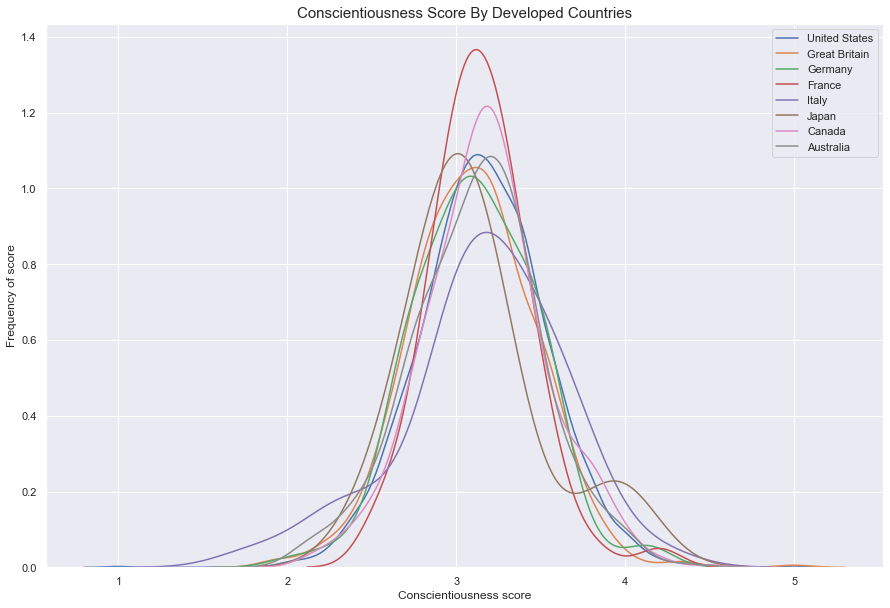

In [37]:
# chart Conscientiousness score by Developed Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_US['CSN_AVG']);
sns.kdeplot(df_GB['CSN_AVG']);
sns.kdeplot(df_DE['CSN_AVG']);
sns.kdeplot(df_FR['CSN_AVG']);
sns.kdeplot(df_IT['CSN_AVG']);
sns.kdeplot(df_JP['CSN_AVG']);
sns.kdeplot(df_CA['CSN_AVG']);
sns.kdeplot(df_AU['CSN_AVG']);
plt.legend(['United States','Great Britain','Germany','France','Italy','Japan','Canada','Australia']);
plt.xlabel('Conscientiousness score');
plt.ylabel('Frequency of score');
plt.title('Conscientiousness Score By Developed Countries', fontsize=15);

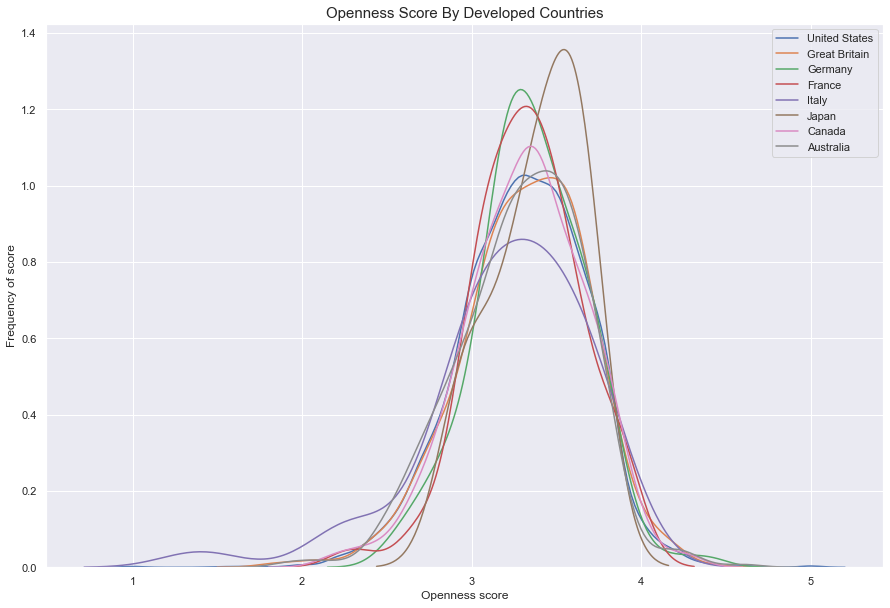

In [38]:
# chart Openness score by Developed Countries

#fig, axs = plt.subplots(2, 2);
sns.kdeplot(df_US['OPN_AVG']);
sns.kdeplot(df_GB['OPN_AVG']);
sns.kdeplot(df_DE['OPN_AVG']);
sns.kdeplot(df_FR['OPN_AVG']);
sns.kdeplot(df_IT['OPN_AVG']);
sns.kdeplot(df_JP['OPN_AVG']);
sns.kdeplot(df_CA['OPN_AVG']);
sns.kdeplot(df_AU['OPN_AVG']);
plt.legend(['United States','Great Britain','Germany','France','Italy','Japan','Canada','Australia']);
plt.xlabel('Openness score');
plt.ylabel('Frequency of score');
plt.title('Openness Score By Developed Countries', fontsize=15);

In [39]:
personality_traits = ['EXT_AVG','EST_AVG','AGR_AVG','CSN_AVG','OPN_AVG']
traits_labels = ['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']

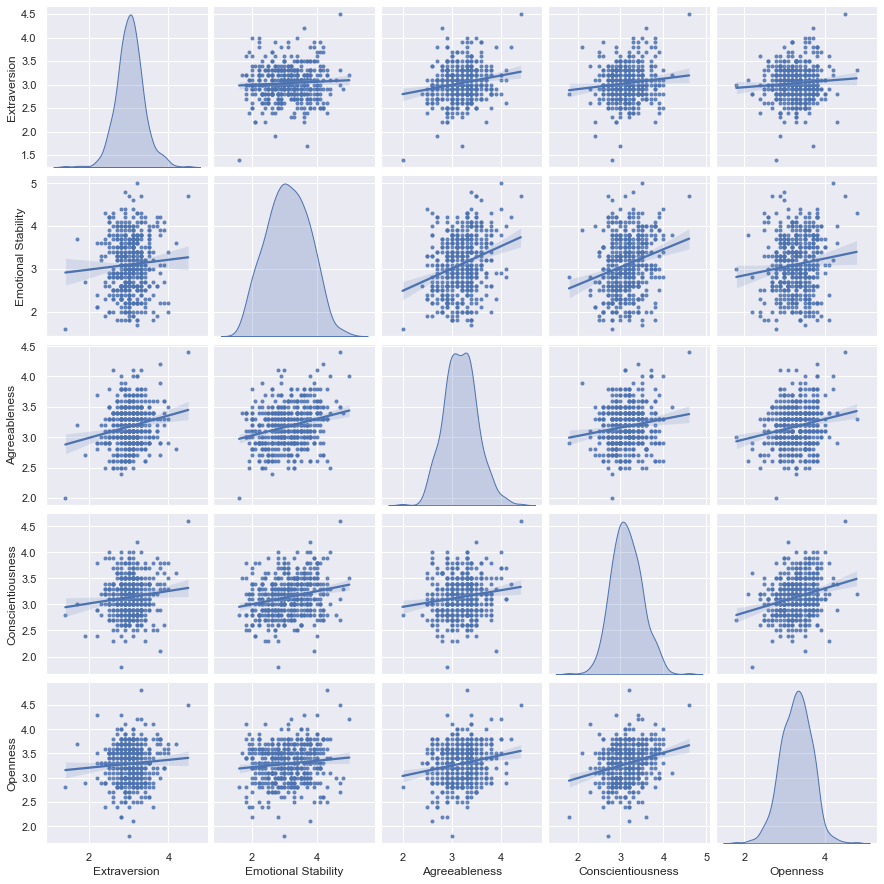

In [40]:
#generate pairplot for 1000 samples
df15=df9.sample(n=500, random_state=1);
sns.pairplot(df9.rename(columns={f:d for f, d in zip(personality_traits,traits_labels)}).sample(500), diag_kind="kde", kind="reg", markers=".");

In [ ]:
# Positive corr: Extraversion vs Agreeableness, Conscientiousness, Openness (Emotional Stability)
# Positive corr: Emotionally Stability vs Conscientiousness,Agreeableness, Openness (Extraversion)
# Positive corr: Agreeableness vs Emotional Stability, Conscientiousness, Extraversion, Openness, 
# Positive corr: Conscientiousness vs Openness,Emotional Stability, Agreeableness, Extraversion
# Positive corr: Openness vs Conscientiousness,Agreeableness, Emotional Stability, Extraversion

In [41]:
df9.head(3)

,EXT_AVG,EST_AVG,AGR_AVG,CSN_AVG,OPN_AVG,country
456553,2.6,3.0,3.1,3.0,2.9,US
201429,3.4,2.4,3.3,3.4,2.8,AU
661906,2.7,3.8,3.3,3.4,3.6,GB


In [42]:
df15=df9.rename(columns={f:d for f, d in zip(personality_traits,traits_labels)}).sample(500)
dfcorr=(df15.drop('country', axis=1)).corr()

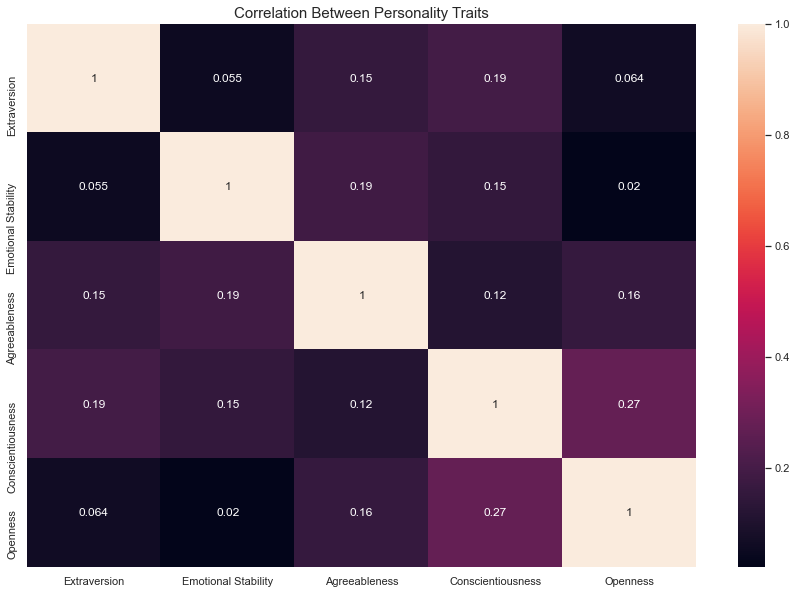

In [43]:
sns.heatmap(dfcorr, annot=True);
plt.title('Correlation Between Personality Traits', fontsize=15);

In [44]:
dfcorr

,Extraversion,Emotional Stability,Agreeableness,Conscientiousness,Openness
Extraversion,1.000000,0.054713,0.154899,0.193274,0.063802
Emotional Stability,0.054713,1.000000,0.185858,0.151924,0.020439
Agreeableness,0.154899,0.185858,1.000000,0.115342,0.159774
Conscientiousness,0.193274,0.151924,0.115342,1.000000,0.273755
Openness,0.063802,0.020439,0.159774,0.273755,1.000000


In [45]:
df15.head()

,Extraversion,Emotional Stability,Agreeableness,Conscientiousness,Openness,country
45683,2.9,3.5,3.2,2.5,3.5,AU
173065,3.1,3.2,2.9,3.6,3.2,US
679133,2.8,3.0,2.7,3.6,3.5,US
741519,2.7,3.3,2.9,3.0,3.8,AU
769600,3.4,2.9,3.3,3.5,3.7,RO


In [68]:
df_SG.shape

(746, 6)

In [52]:
df_SG_1=df_SG.mode(axis=0).mean(axis=0).to_frame()

In [53]:
df_SG_1.reset_index(inplace=True)

In [56]:
df_SG_1.rename(columns={'index':'traits',0:'scores'},inplace=True)

In [59]:
df_SG_1.replace(personality_traits,traits_labels, inplace=True)

In [63]:
df_SG_1.sort_values('scores', ascending=False, inplace=True)

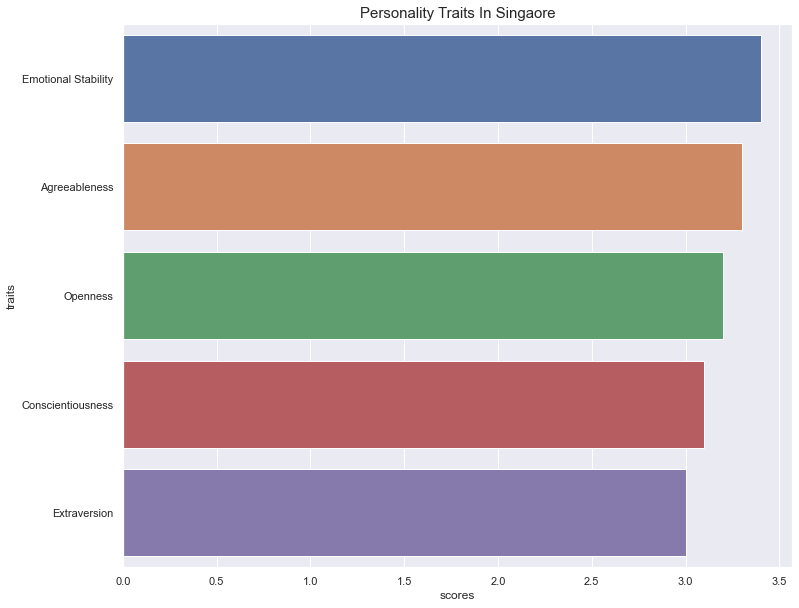

In [67]:
fig = plt.gcf()
fig.set_size_inches(12,10)
sns.barplot(x='scores', y='traits', data=df_SG_1);
plt.title('Personality Traits In Singaore', fontsize=15);

In [72]:
df_MY_1=df_MY.mode(axis=0).mean(axis=0).to_frame()
df_MY_1.reset_index(inplace=True)
df_MY_1.rename(columns={'index':'traits',0:'scores'},inplace=True)
df_MY_1.replace(personality_traits,traits_labels, inplace=True)
df_MY_1.sort_values('scores', ascending=False, inplace=True)

In [73]:
df_MY_1

,traits,scores
2,Agreeableness,3.6
3,Conscientiousness,3.2
0,Extraversion,3.1
1,Emotional Stability,3.0
4,Openness,3.0


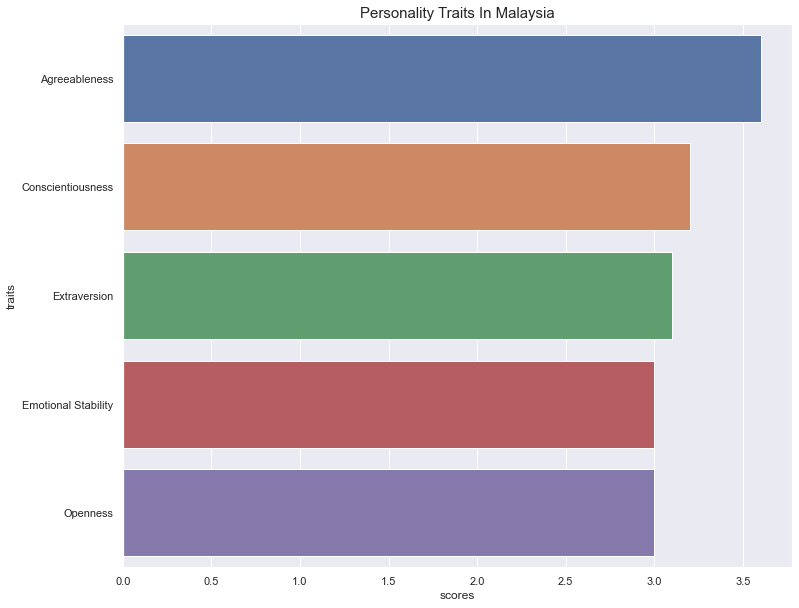

In [75]:
fig = plt.gcf()
fig.set_size_inches(12,10)
sns.barplot(x='scores', y='traits', data=df_MY_1);
plt.title('Personality Traits In Malaysia', fontsize=15);

In [78]:
df_AU_1=df_AU.mode(axis=0).mean(axis=0).to_frame()
df_AU_1.reset_index(inplace=True)
df_AU_1.rename(columns={'index':'traits',0:'scores'},inplace=True)
df_AU_1.replace(personality_traits,traits_labels, inplace=True)
df_AU_1.sort_values('scores', ascending=False, inplace=True)

In [79]:
df_AU_1

,traits,scores
4,Openness,3.5
3,Conscientiousness,3.2
2,Agreeableness,3.1
0,Extraversion,3.0
1,Emotional Stability,2.9


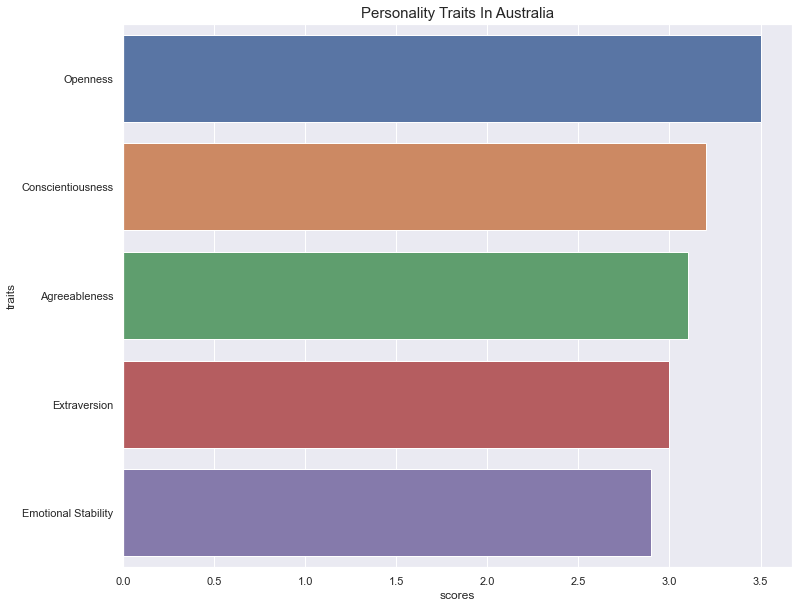

In [80]:
fig = plt.gcf()
fig.set_size_inches(12,10)
sns.barplot(x='scores', y='traits', data=df_AU_1);
plt.title('Personality Traits In Australia', fontsize=15);

In [81]:
df_IN_1=df_IN.mode(axis=0).mean(axis=0).to_frame()
df_IN_1.reset_index(inplace=True)
df_IN_1.rename(columns={'index':'traits',0:'scores'},inplace=True)
df_IN_1.replace(personality_traits,traits_labels, inplace=True)
df_IN_1.sort_values('scores', ascending=False, inplace=True)

In [82]:
df_IN_1

,traits,scores
2,Agreeableness,3.4
1,Emotional Stability,3.3
3,Conscientiousness,3.2
0,Extraversion,3.0
4,Openness,3.0


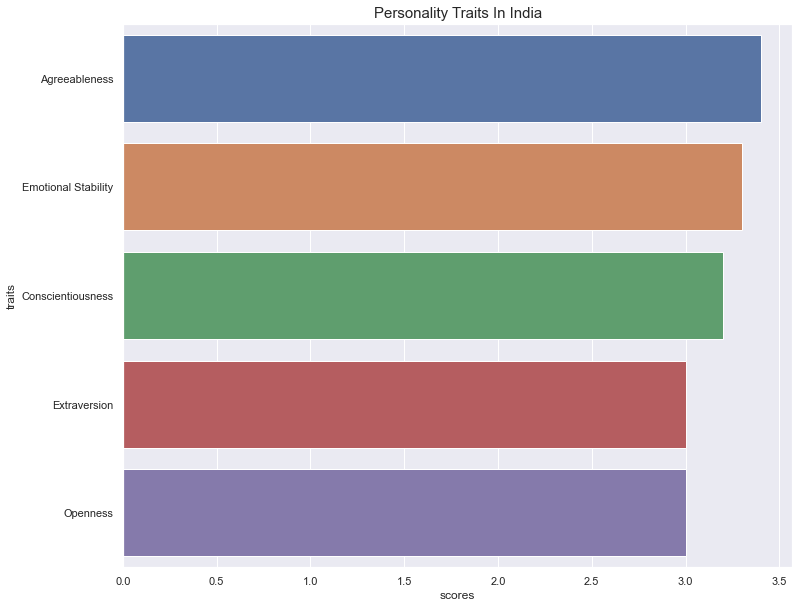

In [83]:
fig = plt.gcf()
fig.set_size_inches(12,10)
sns.barplot(x='scores', y='traits', data=df_IN_1);
plt.title('Personality Traits In India', fontsize=15);